# Lab 09 XOR - Deep Neural Network
* XOR 문제를 Deep Neural Network 활용해 풀어보도록 하겠습니다.

### 기본 Library 선언 및 Tensorflow 버전 확인

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras import layers, Input

tf.random.set_seed(0)   # for reproducibility
print(tf.__version__)

2.12.0


### 강의에 설명할 Data입니다
* x_data가 2차원 배열이기에 2차원 공간에 표현하여 x1과 x2를 기준으로 y_data 0과 1로 구분하는 예제입니다
* 붉은색과 푸른색으로 0과 1을 표시해 보도록 하겠습니다.

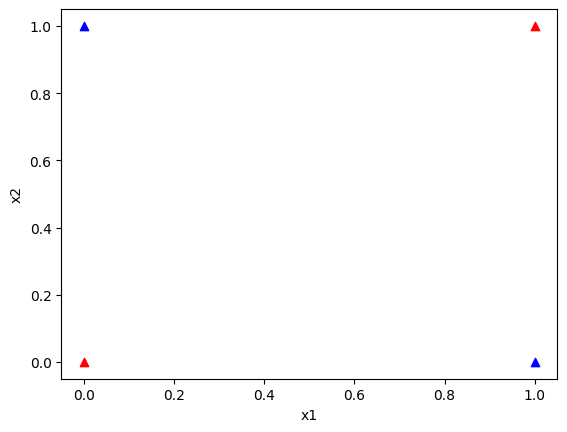

In [2]:
x_data = [[0, 0],
          [0, 1],
          [1, 0],
          [1, 1]]
y_data = [[0],
          [1],
          [1],
          [0]]

plt.scatter(x_data[0][0],x_data[0][1], c='red' , marker='^')
plt.scatter(x_data[3][0],x_data[3][1], c='red' , marker='^')
plt.scatter(x_data[1][0],x_data[1][1], c='blue' , marker='^')
plt.scatter(x_data[2][0],x_data[2][1], c='blue' , marker='^')

plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

##  Tensorflow
### 위 Data를 기준으로 XOR처리를 위한 모델을 만들도록 하겠습니다
* Tensorflow data API를 통해 학습시킬 값들을 담는다 (Batch Size는 한번에 학습시킬 Size로 정한다)
* features,labels는 실재 학습에 쓰일 Data (연산을 위해 Type를 맞춰준다)

In [11]:
dataset = tf.data.Dataset.from_tensor_slices((x_data, y_data)).batch(len(x_data))
nb_classes = 10

class wide_deep_nn():
    def __init__(self, nb_classes):
        super(wide_deep_nn, self).__init__()
        self.W = tf.Variable(tf.random.normal([4, nb_classes]), name='weight')
        self.b = tf.Variable(tf.random.normal([nb_classes]), name='bias')
     
        self.W1 = tf.Variable(tf.random.normal([2, nb_classes]), name='weight1')
        self.b1 = tf.Variable(tf.random.normal([nb_classes]), name='bias1')

        self.W2 = tf.Variable(tf.random.normal([nb_classes, nb_classes]), name='weight2')
        self.b2 = tf.Variable(tf.random.normal([nb_classes]), name='bias2')

        self.W3 = tf.Variable(tf.random.normal([nb_classes, nb_classes]), name='weight3')
        self.b3 = tf.Variable(tf.random.normal([nb_classes]), name='bias3')

        self.W4 = tf.Variable(tf.random.normal([nb_classes, 1]), name='weight4')
        self.b4 = tf.Variable(tf.random.normal([1]), name='bias4')
        self.variables = [self.W,self.b,self.W1,self.b1,self.W2,self.b2,self.W3,self.b3,self.W4,self.b4]
        
    def preprocess_data(self, features, labels):
        features = tf.cast(features, tf.float32)
        labels = tf.cast(labels, tf.float32)
        return features, labels
        
    def deep_nn(self, features):
        layer1 = tf.math.sigmoid(tf.matmul(features, self.W1) + self.b1)
        layer2 = tf.math.sigmoid(tf.matmul(layer1, self.W2) + self.b2)
        layer3 = tf.math.sigmoid(tf.matmul(layer2, self.W3) + self.b3)
        hypothesis = tf.math.sigmoid(tf.matmul(layer3, self.W4) + self.b4)
        return hypothesis
    
    def loss_fn(self, hypothesis, features, labels):
        cost = -tf.reduce_mean(labels * tf.math.log(hypothesis) + (1 - labels) * tf.math.log(1 - hypothesis))
        return cost

    def accuracy_fn(self, hypothesis, labels):
        predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
        accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.float32))
        return accuracy

    def grad(self, hypothesis, features, labels):
        with tf.GradientTape() as tape:
            loss_value = self.loss_fn(self.deep_nn(features),features,labels)
        return tape.gradient(loss_value,self.variables)
    
    def fit(self, dataset, EPOCHS=20000, verbose=500):
        optimizer =  tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.01)
        for step in range(EPOCHS):
            for features, labels in iter(dataset):
                features, labels = self.preprocess_data(features, labels)
                grads = self.grad(self.deep_nn(features), features, labels)
                optimizer.apply_gradients(grads_and_vars=zip(grads, self.variables))
                if step % verbose == 0:
                    print("Iter: {}, Loss: {:.4f}".format(step, self.loss_fn(self.deep_nn(features),features,labels)))

    def test_model(self,x_data, y_data):
        x_data, y_data = self.preprocess_data(x_data, y_data)
        test_acc = self.accuracy_fn(self.deep_nn(x_data),y_data)
        print("Testset Accuracy: {:.4f}".format(test_acc))

Deep Neural Network를 통해 XOR해결 
* 위의 Data를 4Layer의 Neural Network를 통해 학습시킨 후 모델을 생성합니다. 

In [12]:
model = wide_deep_nn(nb_classes)

In [13]:
model.fit(dataset)

Iter: 0, Loss: 1.8016
Iter: 500, Loss: 0.6962
Iter: 1000, Loss: 0.6954
Iter: 1500, Loss: 0.6947
Iter: 2000, Loss: 0.6941
Iter: 2500, Loss: 0.6935
Iter: 3000, Loss: 0.6929
Iter: 3500, Loss: 0.6923
Iter: 4000, Loss: 0.6917
Iter: 4500, Loss: 0.6911
Iter: 5000, Loss: 0.6905
Iter: 5500, Loss: 0.6898
Iter: 6000, Loss: 0.6891
Iter: 6500, Loss: 0.6884
Iter: 7000, Loss: 0.6876
Iter: 7500, Loss: 0.6868
Iter: 8000, Loss: 0.6859
Iter: 8500, Loss: 0.6848
Iter: 9000, Loss: 0.6837
Iter: 9500, Loss: 0.6825
Iter: 10000, Loss: 0.6811
Iter: 10500, Loss: 0.6796
Iter: 11000, Loss: 0.6778
Iter: 11500, Loss: 0.6758
Iter: 12000, Loss: 0.6735
Iter: 12500, Loss: 0.6709
Iter: 13000, Loss: 0.6678
Iter: 13500, Loss: 0.6643
Iter: 14000, Loss: 0.6601
Iter: 14500, Loss: 0.6550
Iter: 15000, Loss: 0.6491
Iter: 15500, Loss: 0.6418
Iter: 16000, Loss: 0.6330
Iter: 16500, Loss: 0.6222
Iter: 17000, Loss: 0.6088
Iter: 17500, Loss: 0.5921
Iter: 18000, Loss: 0.5713
Iter: 18500, Loss: 0.5451
Iter: 19000, Loss: 0.5125
Iter: 1950

In [14]:
model.test_model(x_data, y_data)

Testset Accuracy: 1.0000
